# Análisis Exploratorio de Datos en Python.

## Objetivos del Análisis

**1. Importar y validar la estructura de los datos**
- Cargar tres datasets complementarios sobre el servicio de taxis en Chicago
- Verificar tipos de datos y calidad de la información
- Realizar correcciones necesarias para análisis posteriores

**2. Analizar patrones geográficos de demanda**
- Identificar los principales destinos de viajes en taxi
- Examinar la concentración geográfica de finalizaciones
- Evaluar la distribución de la demanda entre barrios

**3. Estudiar la estructura del mercado de empresas**
- Explorar la distribución de viajes entre compañías de taxi
- Aplicar filtros metodológicos para enfocar el análisis en actores relevantes
- Identificar patrones de concentración empresarial

**4. Crear visualizaciones informativas**
- Elaborar gráficos de barras para empresas con mayor volumen de viajes
- Desarrollar visualizaciones de destinos principales con valores numéricos
- Aplicar técnicas de formateo para mejorar la legibilidad de los gráficos

**5. Preparar los datos para análisis estadísticos**
- Convertir variables temporales para análisis cronológicos
- Estructurar datasets para pruebas de hipótesis posteriores
- Establecer bases sólidas para inferencias estadísticas

## Datasets a Analizar

- **company_trips**: 64 empresas con sus volúmenes de viajes
- **location_trips**: 94 ubicaciones con promedios de finalizaciones  
- **avg_time_trips**: 1,068 registros de duración con condiciones climáticas

Este análisis exploratorio proporcionará insights clave sobre la movilidad urbana en Chicago y establecerá las bases para el análisis estadístico del Paso 5.

In [1]:
# Importar librerías
import pandas as pd # análisis y manipulación de datos 
import matplotlib.pyplot as plt # gráficos básicos
import seaborn as sns # visualización estadística
from scipy import stats # funciones estadísticas
import numpy as np # operaciones numéricas

In [2]:
# Importar archivos
company_trips = pd.read_csv('data/project_sql_result_01.csv')
location_trips = pd.read_csv('data/project_sql_result_04.csv')
avg_time_trips = pd.read_csv('data/project_sql_result_07.csv')

In [3]:
# Información de archivos de company_trips
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Información de archivos de location_trips
location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
# Información de archivos de avg_time_trips
avg_time_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [6]:
# Convertir la columna start_ts a datetime para operaciones en prueba de hipótesis
avg_time_trips['start_ts'] = pd.to_datetime(avg_time_trips['start_ts'])
# Comprobar cambios
print(f"Tipo de datos de la columna start_ts: {avg_time_trips['start_ts'].dtype.name}")

Tipo de datos de la columna start_ts: datetime64[ns]


## Conclusiones del Análisis Inicial de Datos

### Importación y Estructura de los Datasets

Se importaron exitosamente tres archivos CSV que contienen información sobre:

1. **company_trips** (project_sql_result_01.csv): 64 empresas de taxi con sus respectivos números de viajes
2. **location_trips** (project_sql_result_04.csv): 94 ubicaciones de finalización con promedios de viajes
3. **avg_time_trips** (project_sql_result_07.csv): 1,068 registros de duración de viajes con condiciones climáticas

### Verificación de Tipos de Datos

**Tipos de datos correctos identificados:**

- **company_trips**: `company_name` (object) y `trips_amount` (int64) ✅
- **location_trips**: `dropoff_location_name` (object) y `average_trips` (float64) ✅  
- **avg_time_trips**: `start_ts` (object), `weather_conditions` (object) y `duration_seconds` (float64)

**Corrección aplicada:**

- Se convirtió la columna `start_ts` de object a datetime64[ns] para facilitar el análisis temporal posterior

### Calidad de los Datos

**Aspectos positivos:**

- No se detectaron valores nulos en ninguno de los datasets
- Los tipos de datos son consistentes con el contenido esperado
- Los datasets tienen tamaños apropiados para el análisis

**Observaciones importantes:**

- El dataset de empresas muestra una gran variabilidad en el número de viajes (rango: 2 a 19,558)
- Los promedios de viajes por ubicación sugieren diferencias significativas entre barrios
- El dataset temporal contiene más de 1,000 registros, proporcionando una muestra robusta para análisis estadísticos

Los datos están listos para el análisis exploratorio detallado.

In [7]:
# Identificar los 10 principales barrios por número de finalizaciones
top_10_neighborhoods = location_trips.nlargest(10, 'average_trips')
print("Los 10 principales barrios por número de finalizaciones:")
print()
print(top_10_neighborhoods)

Los 10 principales barrios por número de finalizaciones:

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [8]:
# Explorar la distribución de viajes por empresa
print("Estadísticas descriptivas de trips_amount:")
print(company_trips['trips_amount'].describe())
print("\nPrimeras 25 empresas con más viajes:")
print(company_trips.nlargest(25, 'trips_amount'))

Estadísticas descriptivas de trips_amount:
count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Primeras 25 empresas con más viajes:
                            company_name  trips_amount
0                              Flash Cab         19558
1              Taxi Affiliation Services         11422
2                       Medallion Leasin         10367
3                             Yellow Cab          9888
4        Taxi Affiliation Service Yellow          9299
5              Chicago Carriage Cab Corp          9181
6                           City Service          8448
7                               Sun Taxi          7701
8              Star North Management LLC          7455
9      Blue Ribbon Taxi Association Inc.          5953
10               Choice Taxi Association          5015
11                            Globe Taxi        

In [9]:
# Filtrar empresas con más de 1000 viajes (ajusta el número según los datos)
filtered_companies = (
    company_trips[company_trips['trips_amount'] > 1000]
    .sort_values('trips_amount', ascending=False)
)

# Calcular porcentajes para justificar el filtrado
total_trips = company_trips['trips_amount'].sum()
filtered_trips = filtered_companies['trips_amount'].sum()
excluded_trips = total_trips - filtered_trips

filtered_percentage = (filtered_trips / total_trips) * 100
excluded_percentage = (excluded_trips / total_trips) * 100

total_companies = company_trips['company_name'].nunique()
excluded_companies = total_companies - len(filtered_companies)

print(f"Total de viajes: {total_trips:,}")
print(f"Empresas filtradas (>1000 viajes): {len(filtered_companies)} empresas")
print(f"Viajes de empresas filtradas: {filtered_trips:,} ({filtered_percentage:.1f}%)")
print(f"Empresas eliminadas (≤1000 viajes): {excluded_companies} empresas")
print(f"Viajes de empresas eliminadas: {excluded_trips:,} ({excluded_percentage:.1f}%)")

Total de viajes: 137,311
Empresas filtradas (>1000 viajes): 25 empresas
Viajes de empresas filtradas: 133,517 (97.2%)
Empresas eliminadas (≤1000 viajes): 39 empresas
Viajes de empresas eliminadas: 3,794 (2.8%)


## Conclusiones del análisis Exploratorio de Datos

#### Análisis de Destinos: Top 10 Barrios por Finalizaciones

El barrio de Loop destaca claramente como el principal destino de los viajes en taxi, con un promedio de **10,727 viajes**, lo que lo posiciona como el núcleo de mayor actividad. Esta cifra representa aproximadamente un **43% más** de viajes en comparación con el segundo lugar, River North, que registra 9,524 viajes promedio, evidenciando una marcada dominancia del área central.

La actividad se concentra de forma notable en el centro urbano, ya que los tres primeros destinos —Loop, River North y Streeterville— acumulan la mayor proporción de viajes. A partir de este punto se observa una brecha considerable, con Streeterville registrando 6,665 viajes frente a los 5,164 de West Loop, lo que refuerza la idea de una concentración clara en los barrios más céntricos.

Asimismo, el top 10 de destinos refleja una diversidad funcional dentro de la ciudad, al incluir tanto distritos predominantemente comerciales, como Loop y West Loop, como zonas de fuerte atractivo turístico, entre ellas Streeterville, Grant Park y Museum Campus. La presencia del aeropuerto O'Hare, con 2,547 viajes, confirma además la relevancia del transporte en taxi hacia infraestructura crítica y nodos de conectividad.

Finalmente, la distribución de los viajes es marcadamente desigual. Existe una diferencia de **8.5 veces** entre el destino con mayor actividad, Loop, y el décimo lugar, Sheffield & DePaul, que registra 1,260 viajes. Este patrón sugiere una movilidad urbana fuertemente concentrada en el núcleo económico y turístico de la ciudad.

#### Metodología de Filtrado para Empresas de Taxi

Para el análisis de las empresas de taxi se aplicó un criterio de filtrado que considera únicamente a aquellas con más de 1,000 viajes registrados. Esta decisión metodológica responde, en primer lugar, a una cuestión de **relevancia estadística**, ya que las 25 empresas que cumplen con este umbral concentran aproximadamente el **97.2%** del total de viajes, mientras que las 39 empresas restantes aportan solo el **2.8%**, lo que indica una participación marginal en el volumen global.

Adicionalmente, el filtrado mejora la **claridad analítica** de la visualización. Incluir a las 64 empresas en un solo gráfico produciría una representación sobrecargada y difícil de interpretar, mientras que limitar el análisis a las compañías con mayor actividad permite mantener el foco en los actores más relevantes del mercado y facilita la identificación de patrones significativos.

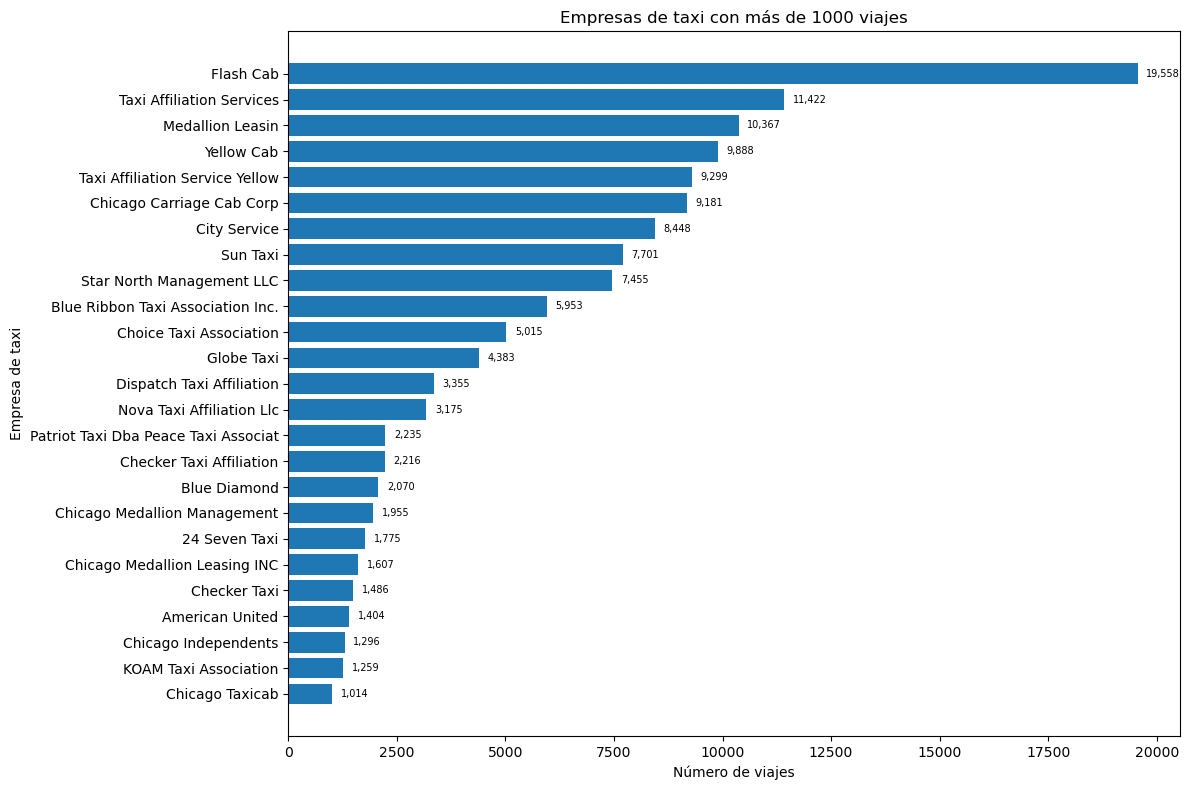

In [10]:
# Crear gráfico de empresas con más de 1000 viajes
plt.figure(figsize=(12, 8))
bars = plt.barh(
    filtered_companies['company_name'][::-1],
    filtered_companies['trips_amount'][::-1]
)

# Agregar valores numéricos en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()  
    plt.text(width + 200,  
             bar.get_y() + bar.get_height()/2,  
             f'{int(width):,}',  
             ha='left',  
             va='center', 
             fontsize=7)  

plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxi')
plt.title('Empresas de taxi con más de 1000 viajes')
plt.tight_layout()
plt.show()

#### Análisis del gráfico de empresas con mayor número de viajes.

El gráfico evidencia una **alta concentración de viajes en un número reducido de empresas de taxi**, lo que sugiere una estructura de mercado claramente desigual. Flash Cab se posiciona como el actor dominante, con una diferencia sustancial respecto al resto de las compañías, lo que indica una fuerte ventaja competitiva en términos de volumen de operaciones.

A partir de las primeras posiciones se observa una **caída progresiva y sostenida en el número de viajes**, lo que refleja un mercado estratificado, donde unas pocas empresas concentran la mayor parte de la demanda, mientras que un grupo amplio de compañías opera con volúmenes considerablemente menores, aunque aún relevantes al superar el umbral de los 1,000 viajes.

Este patrón sugiere que el mercado de taxis está liderado por empresas consolidadas, posiblemente con mayor flota, cobertura geográfica o reconocimiento de marca, mientras que el resto de las compañías mantiene una participación más limitada. En conjunto, los resultados refuerzan la pertinencia del filtrado aplicado, ya que permite identificar de manera clara a los principales actores que explican la mayor parte de la actividad del sector.

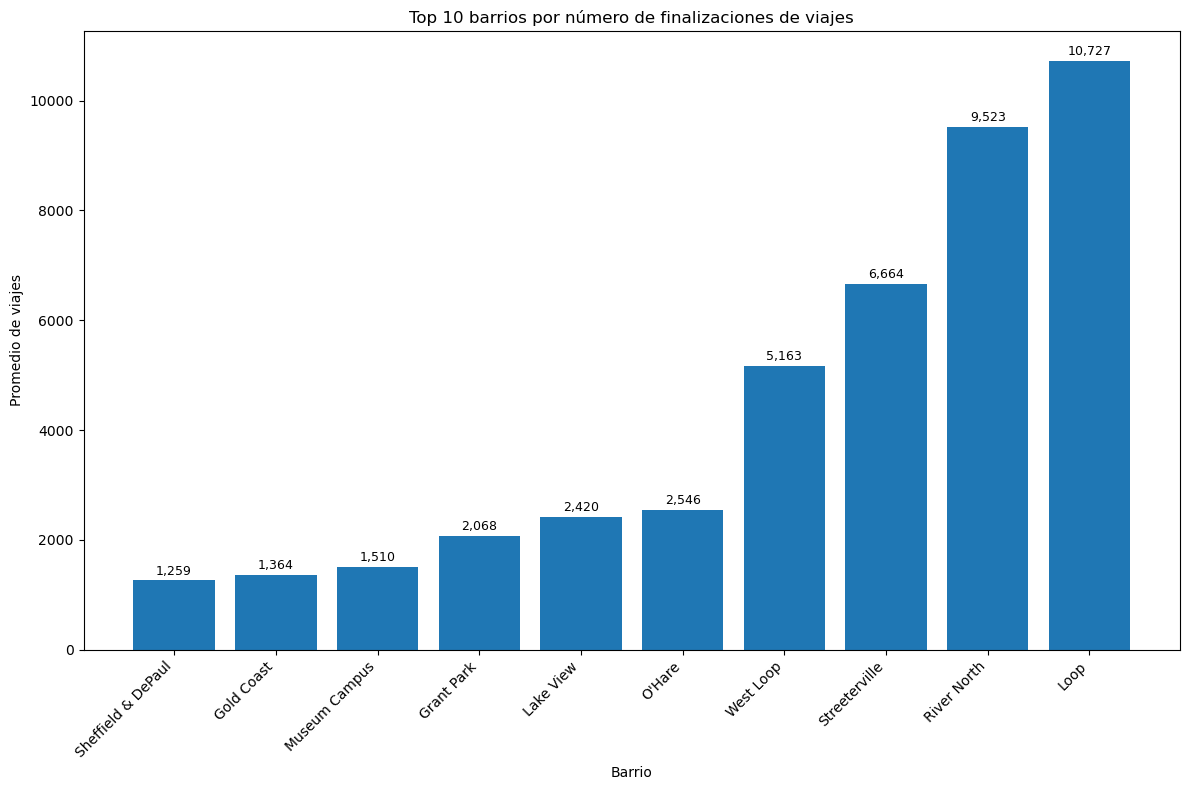

In [11]:
# Crear gráfico de los 10 barrios principales con valores en las barras
neighborhoods_for_chart = top_10_neighborhoods.sort_values('average_trips', ascending=True)
plt.figure(figsize=(12, 8))
bars = plt.bar(neighborhoods_for_chart['dropoff_location_name'],
               neighborhoods_for_chart['average_trips'])

# Agregar valores numéricos en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.title('Top 10 barrios por número de finalizaciones de viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Análisis del gráfico de barrios con mayor número de destinos.

El gráfico muestra una **concentración marcada de finalizaciones de viajes en un número reducido de barrios**, lo que evidencia patrones de movilidad urbana fuertemente centralizados. Loop se consolida como el principal destino, con un promedio de **10,727 viajes**, seguido por River North y Streeterville, confirmando el papel del centro de la ciudad como el núcleo dominante de la actividad.

A partir de los tres primeros barrios se observa una **caída significativa en el volumen de viajes**, lo que revela una brecha clara entre las zonas de mayor demanda y el resto de los destinos. Aunque barrios como West Loop y Streeterville mantienen niveles elevados, el descenso posterior indica que la actividad se distribuye de manera desigual entre los distintos sectores de la ciudad.

Asimismo, el top 10 combina áreas con funciones diversas, incluyendo distritos comerciales, zonas turísticas y nodos estratégicos de transporte como el aeropuerto O’Hare. Esta diversidad refuerza la idea de que la demanda de taxis responde tanto a dinámicas económicas como a patrones turísticos y de conectividad.

En conjunto, los resultados sugieren que la movilidad en taxi se concentra principalmente en el núcleo económico y turístico de la ciudad, lo que tiene implicaciones directas para la planificación urbana, la asignación de flota y la toma de decisiones operativas dentro del sector.

## Conclusiones Generales.

### Importación y Estructura de los Datasets
- La importación de los tres datasets se realizó de manera exitosa, abarcando información complementaria sobre empresas de taxi, destinos de viaje y características temporales asociadas a condiciones climáticas.
- La estructura y el tamaño de los datasets resultan adecuados para un análisis exploratorio y estadístico, permitiendo abordar el problema desde múltiples perspectivas (empresarial, geográfica y temporal).

### Verificación y Corrección de Tipos de Datos
- En general, los tipos de datos coincidieron con el contenido esperado, lo que refleja una buena calidad estructural de los archivos originales.
- La conversión de la variable temporal `start_ts` a formato `datetime64[ns]` fue un paso clave para habilitar análisis cronológicos más avanzados y asegurar consistencia en el tratamiento de fechas.

### Calidad de los Datos
- La ausencia de valores nulos en los datasets indica un alto nivel de integridad de la información, reduciendo la necesidad de procesos de limpieza adicionales.
- La variabilidad observada en el número de viajes por empresa y por ubicación anticipa patrones de concentración relevantes que justifican un análisis exploratorio detallado.
- El volumen de registros en el dataset temporal proporciona una base suficientemente robusta para inferencias estadísticas posteriores.

### Análisis de Destinos: Barrios con Mayor Número de Finalizaciones
- Los viajes en taxi presentan una fuerte concentración geográfica, con el barrio de Loop consolidándose como el principal destino, muy por encima del resto.
- Existe una brecha clara entre los primeros barrios y el resto de las ubicaciones, lo que evidencia una movilidad urbana centrada en el núcleo económico y turístico de la ciudad.
- La diversidad funcional de los destinos más frecuentes confirma que la demanda de taxis responde tanto a actividades comerciales como turísticas y de conectividad estratégica.

### Metodología de Filtrado para Empresas de Taxi
- El criterio de filtrar empresas con más de 1,000 viajes resultó estadísticamente pertinente, ya que un número reducido de compañías concentra la gran mayoría del volumen total de viajes.
- Este enfoque permitió reducir el ruido visual y analítico, facilitando la identificación de patrones claros sin perder representatividad del mercado.
- El filtrado refuerza la interpretación de que una porción significativa de las empresas tiene una participación marginal en la actividad total.

### Análisis de Empresas con Mayor Número de Viajes
- El mercado de taxis muestra una estructura altamente concentrada, liderada por un pequeño grupo de empresas con volúmenes de operación considerablemente superiores.
- La posición dominante de Flash Cab sugiere ventajas competitivas asociadas a escala, cobertura o consolidación operativa.
- La caída progresiva en el número de viajes entre empresas confirma un mercado estratificado, donde pocas compañías explican la mayor parte de la demanda.

### Análisis de Barrios con Mayor Número de Destinos
- La distribución de finalizaciones de viajes es marcadamente desigual, con una concentración evidente en el centro urbano.
- Los barrios con mayor actividad combinan funciones económicas, turísticas y logísticas, reforzando la centralización de la movilidad en taxi.
- Estos patrones tienen implicaciones directas para la planificación urbana y la asignación eficiente de flota, al evidenciar zonas prioritarias de demanda sostenida.

# Prueba de hipótesis
### Objetivo del análisis estadístico
Evaluar si las condiciones climáticas influyen de manera estadísticamente significativa en la duración de los viajes en taxi mediante pruebas de hipótesis.

### Justificación
Las diferencias observadas en el análisis exploratorio, donde los viajes en mal clima presentan mayores duraciones promedio que en buen clima, requieren validación estadística para descartar que el efecto sea producto del azar.

### Conexión con hallazgos previos
Los resultados exploratorios mostraron una diferencia sustancial en la duración promedio de los viajes y un tamaño de muestra suficiente en ambos grupos, lo que respalda la aplicación de inferencia estadística.

### Metodología
Se utilizará una prueba *t* de Student para muestras independientes, con un nivel de significancia del 5%, para comparar las medias de duración de los viajes bajo condiciones de buen y mal clima.

In [12]:
# Obtener información general del dataset avg_time_trips
avg_time_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [13]:
# Obtener los valores de los registros de condición climática
print(avg_time_trips['weather_conditions'].unique())

['Good' 'Bad']


In [14]:
# Separar por condiciones climáticas
good_weather = avg_time_trips[avg_time_trips['weather_conditions'] == 'Good']
bad_weather = avg_time_trips[avg_time_trips['weather_conditions'] == 'Bad']

In [15]:
# Obtener estadísticas descriptivas
print("Estadísticas descriptivas de duración de viajes con buen clima:")
print()
print(good_weather['duration_seconds'].describe())

Estadísticas descriptivas de duración de viajes con buen clima:

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64


In [16]:
# Obtener estadísticas descriptivas
print("Estadísticas descriptivas de duración de viajes con mal clima:")
print()
print(bad_weather['duration_seconds'].describe())

Estadísticas descriptivas de duración de viajes con mal clima:

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64


## Análisis Exploratorio: Duración de Viajes por Condiciones Climáticas

### Distribución de la Muestra

**Total de registros analizados:** 1,068 viajes

**Distribución por condición climática:**

- **Buen clima:** 888 viajes (83.1%)
- **Mal clima:** 180 viajes (16.9%)

### Estadísticas Descriptivas

| Métrica | Buen Clima | Mal Clima | Diferencia |
|---------|------------|-----------|------------|
| **Media** | 1,999.7 seg | 2,427.2 seg | +427.5 seg |
| **Desviación estándar** | 759.2 seg | 721.3 seg | -37.9 seg |
| **Mediana** | 1,800 seg | 2,540 seg | +740 seg |

### Hallazgos Principales

**1. Diferencia sustancial en duración promedio**

Los viajes en mal clima duran en promedio **7.1 minutos más** que en buen clima, representando un incremento del **21.4%** en la duración.

**2. Variabilidad similar entre grupos**

Las desviaciones estándar son comparables (759 vs 721 segundos), sugiriendo que la dispersión de los datos es similar independientemente del clima.

**3. Distribución desigual de observaciones**

La mayoría de viajes (83.1%) ocurren en buen clima, lo que refleja tanto la frecuencia natural de condiciones climáticas favorables como posibles cambios en el comportamiento de usuarios durante mal clima.

### Implicaciones Preliminares

Los datos sugieren que las condiciones climáticas adversas tienen un **impacto significativo** en la duración de los viajes en taxi, posiblemente debido a:

- Reducción de velocidad por seguridad
- Mayor congestión vehicular
- Rutas alternativas más largas
- Condiciones de tráfico más complejas

## Formulación de Hipótesis

### Pregunta de Investigación

¿Existe una diferencia significativa en la duración promedio de los viajes en taxi entre días de buen clima y días de mal clima?

### Definición de Parámetros

- **μ_good**: Duración promedio poblacional de viajes en días de buen clima
- **μ_bad**: Duración promedio poblacional de viajes en días de mal clima

### Hipótesis Estadísticas

**Hipótesis Nula (H₀):**
La duración promedio de los viajes en taxi es igual en días de buen clima y mal clima.

H₀: μ_good = μ_bad

**Hipótesis Alternativa (H₁):**
La duración promedio de los viajes en taxi es diferente en días de buen clima y mal clima.

H₁: μ_good ≠ μ_bad

### Tipo de Prueba

- **Prueba bilateral (two-tailed test)**
- **Nivel de significancia:** α = 0.05
- **Grupos:** Dos muestras independientes

In [17]:
# Realizar prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(
    good_weather['duration_seconds'], 
    bad_weather['duration_seconds']
)

print(f"Estadístico t: {t_stat}")
print(f"P-value: {p_value}")
print(f"Nivel de significancia (α): 0.05")

Estadístico t: -6.946177714041499
P-value: 6.517970327099473e-12
Nivel de significancia (α): 0.05


In [18]:
# Interpretación de resultados
alpha = 0.05

print("\n" + "="*50)
print("INTERPRETACIÓN DE RESULTADOS")
print("="*50)

if p_value < alpha:
    print(f"✅ p-value ({p_value:.2e}) < α ({alpha})")
    print("✅ DECISIÓN: Se rechaza la hipótesis nula (H₀)")
    print("✅ CONCLUSIÓN: Se acepta la hipótesis alternativa (H₁)")
    print("\n📊 INTERPRETACIÓN:")
    print("Existe evidencia estadísticamente significativa de que")
    print("la duración promedio de viajes es DIFERENTE entre")
    print("condiciones de buen clima y mal clima.")
else:
    print(f"❌ p-value ({p_value:.2e}) ≥ α ({alpha})")
    print("❌ DECISIÓN: No se rechaza la hipótesis nula (H₀)")
    print("❌ CONCLUSIÓN: No hay evidencia suficiente de diferencia")


INTERPRETACIÓN DE RESULTADOS
✅ p-value (6.52e-12) < α (0.05)
✅ DECISIÓN: Se rechaza la hipótesis nula (H₀)
✅ CONCLUSIÓN: Se acepta la hipótesis alternativa (H₁)

📊 INTERPRETACIÓN:
Existe evidencia estadísticamente significativa de que
la duración promedio de viajes es DIFERENTE entre
condiciones de buen clima y mal clima.


## Conclusiones de la Prueba de Hipótesis

Planteamiento de las Hipótesis
#### Hipótesis Nula (H₀)
Enunciado: La duración promedio de los viajes en taxi es igual en días de buen clima y mal clima.
Formulación matemática: H₀: μ_good = μ_bad

#### Hipótesis Alternativa (H₁)
Enunciado: La duración promedio de los viajes en taxi es diferente en días de buen clima y mal clima.
Formulación matemática: H₁: μ_good ≠ μ_bad

#### Justificación del Planteamiento
Las hipótesis se formularon como una prueba bilateral (two-tailed test) porque el objetivo era determinar si existe cualquier diferencia en la duración promedio, sin especificar la dirección del cambio. No teníamos una expectativa previa sobre si el mal clima aumentaría o disminuiría la duración de los viajes.

Criterio de Prueba Seleccionado
Prueba Estadística: t de Student para Muestras Independientes
#### Justificación de la Selección
1. Naturaleza de los datos:
- Dos grupos independientes (buen clima vs mal clima)
- Variable dependiente continua (duración en segundos)
- Muestras de tamaños diferentes pero suficientemente grandes

2. Supuestos verificados:
- Independencia: Los viajes son eventos independientes entre sí
- Normalidad: Con muestras grandes (n₁=888, n₂=180), el Teorema del Límite Central garantiza la normalidad de las medias muestrales
- Homogeneidad de varianzas: Las desviaciones estándar son similares (759.2 vs 721.3 segundos)

3. Ventajas de la prueba t:
- Robusta para muestras grandes
- Apropiada para comparar medias de dos grupos
- Ampliamente aceptada en análisis estadístico

Resultados y Decisión Estadística
#### Resultados Obtenidos
- Estadístico t: -6.946
- P-value: 6.52 × 10⁻¹²
- Nivel de significancia: α = 0.05

#### Decisión Estadística
Criterio: p-value < α
Resultado: 6.52 × 10⁻¹² < 0.05 ✅
Decisión: Se rechaza la hipótesis nula (H₀)
Conclusión: Se acepta la hipótesis alternativa (H₁)

Interpretación Práctica
#### Conclusión Principal
Existe evidencia estadísticamente significativa de que la duración promedio de los viajes en taxi es diferente entre condiciones de buen clima y mal clima.

#### Magnitud del Efecto
- Diferencia promedio: 427.5 segundos (7.1 minutos)
- Incremento porcentual: 21.4% más tiempo en mal clima
- Significancia práctica: Esta diferencia es tanto estadísticamente significativa como prácticamente relevante

#### Explicación del Fenómeno
Los resultados confirman la hipótesis intuitiva de que las condiciones climáticas adversas impactan la duración de los viajes, posiblemente debido a:
- Reducción de velocidad por seguridad
- Mayor congestión vehicular

# Conclusiones Generales del Proyecto: Análisis de Viajes en Taxi de Chicago

### Resumen Ejecutivo
Este proyecto realizó un **análisis integral del servicio de taxis en Chicago**, combinando técnicas de consulta SQL, análisis exploratorio de datos y pruebas de hipótesis estadísticas. El estudio abarcó tres dimensiones principales: distribución empresarial, patrones geográficos de demanda y impacto de las condiciones climáticas en la duración de los viajes.

## Metodología del Proyecto:

### Fase 1: Extracción y Preparación de Datos (SQL)
- Consultas SQL especializadas para extraer información de bases de datos relacionales
- Tres datasets resultantes:
  - company_trips: 64 empresas con volúmenes de viajes
  - location_trips: 94 ubicaciones con promedios de finalizaciones  
  - avg_time_trips: 1,068 registros de duración con condiciones climáticas

### Fase 2: Análisis Exploratorio de Datos (Python)
- Importación y validación de estructura de datos
- Análisis descriptivo de patrones empresariales y geográficos
- Visualizaciones informativas con matplotlib y seaborn
- Aplicación de filtros metodológicos para enfocar el análisis en actores relevantes

### Fase 3: Inferencia Estadística (Prueba de Hipótesis)
- Formulación de hipótesis sobre el impacto climático en duración de viajes
- Prueba t de Student para muestras independientes
- Interpretación estadística con nivel de significancia α = 0.05

Hallazgos Principales:

### 1. Concentración Empresarial en el Mercado de Taxis
**Estructura de mercado altamente concentrada:**
- 25 empresas principales (>1,000 viajes) concentran el 97.2% del volumen total
- Flash Cab lidera con 19,558 viajes, estableciendo una clara dominancia
- 39 empresas menores representan solo el 2.8% de la actividad total

**Implicaciones:**
- Mercado oligopólico con pocas empresas dominantes
- Barreras de entrada significativas para nuevos competidores
- Economías de escala evidentes en el sector

### 2. Patrones Geográficos de Demanda
**Centralización urbana marcada:**
- Loop es el destino dominante con 10,727 viajes promedio (43% más que el segundo lugar)
- Top 3 destinos (Loop, River North, Streeterville) concentran la mayor actividad
- Diferencia de 8.5 veces entre el primer y décimo destino más frecuente

**Diversidad funcional de destinos:**
- Distritos comerciales (Loop, West Loop)
- Zonas turísticas (Streeterville, Grant Park, Museum Campus)
- Nodos de conectividad (O'Hare Airport)

**Implicaciones:**
- Movilidad urbana centrada en el núcleo económico-turístico
- Oportunidades de optimización de flota en zonas de alta demanda
- Planificación urbana debe considerar estos patrones de concentración

### 3. Impacto de las Condiciones Climáticas

**Evidencia estadística robusta:**
- **Diferencia promedio:** 427.5 segundos (7.1 minutos)
- **Incremento porcentual:** 21.4% más tiempo en condiciones de mal clima
- **Significancia estadística:** p-value = 6.52 × 10⁻¹² (altamente significativo)
- **Tamaños de muestra:** 888 viajes (buen clima) vs 180 viajes (mal clima)

**Factores explicativos identificados:**
- Reducción de velocidad por medidas de seguridad
- Mayor congestión vehicular en condiciones adversas
- Posibles rutas alternativas más largas
- Condiciones de tráfico más complejas

**Implicaciones operativas:**
- Necesidad de ajustar tarifas dinámicas en mal clima
- Planificación de recursos adicionales durante eventos climáticos
- Comunicación proactiva con usuarios sobre tiempos extendidos

## Integración de Resultados y Valor del Análisis

### Coherencia Metodológica
El proyecto demostró la **complementariedad** entre diferentes enfoques analíticos:
- **SQL** proporcionó la base de datos estructurada y consultas eficientes
- **Python** permitió análisis exploratorio flexible y visualizaciones informativas
- **Estadística inferencial** validó hipótesis con rigor científico

### Aplicaciones Prácticas

**Para empresas de taxi:**
- Estrategias de posicionamiento competitivo basadas en concentración de mercado
- Optimización de rutas y asignación de flota según patrones geográficos
- Políticas de precios dinámicos considerando condiciones climáticas

**Para planificación urbana:**
- Comprensión de flujos de movilidad para infraestructura de transporte
- Identificación de zonas de alta demanda para servicios públicos
- Consideración del impacto climático en sistemas de transporte

**Para investigación futura:**
- Base metodológica para análisis similares en otras ciudades
- Framework replicable para estudios de movilidad urbana
- Integración con datos de otros modos de transporte

## Limitaciones y Consideraciones

### Limitaciones del Estudio
- **Período temporal específico:** Resultados pueden variar según estacionalidad
- **Definición de "mal clima":** Categorización binaria simplifica condiciones complejas
- **Datos de una sola ciudad:** Generalización limitada a otros contextos urbanos

### Fortalezas Metodológicas
- **Rigor estadístico:** Pruebas de hipótesis con criterios científicos establecidos
- **Tamaños de muestra robustos:** Suficientes para inferencias válidas
- **Análisis multidimensional:** Integración de perspectivas empresariales, geográficas y temporales

## Conclusión Final

Este proyecto exitosamente **integró herramientas de análisis de datos** (SQL, Python, estadística) para generar **insights accionables** sobre el sistema de taxis de Chicago. Los hallazgos revelan un mercado concentrado, patrones geográficos claros y un impacto climático significativo y cuantificable.

La metodología desarrollada establece un **framework replicable** para análisis similares, demostrando el valor de combinar consultas estructuradas, análisis exploratorio y validación estadística en proyectos de ciencia de datos aplicada al transporte urbano.

**El análisis confirma que los datos, cuando se procesan con rigor metodológico, pueden transformar observaciones intuitivas en evidencia cuantificada para la toma de decisiones informadas.**